# Quantitative Analysis of Price & Daily Returns

_In this Notebook, I will show you some how to do an analysis quantitatively using numpy and datas from Yahoo Finance, through Amazon Stock. I learned how to do it through some online resources, but the main resource is `https://www.youtube.com/watch?v=PkzVU7Klic0` by Matt Macarty. I will modify some of the codes through learning via the video. Enjoy and contact me via email (denzeledanbanget@gmail.com) if you feel there are some mistakes or troubles on running the code._

Some of the main questions that I will answer are:

* Can we describe the daily routine using normal distribution?
* Is there directional bias in daily change?
* Can price movement be described as a random walk?

Answering some of these questions are very important on understanding the pattern of stock price and doing a forecasting in further deployment. Or it may be one of the basis when we want to make a trading bot in the future.

### 1. Set up Environment and Importing Libraries

* NumPy: Library for Numbers in Python
* pandas: Library for Data Processing and Manipulation
* yfinance : Library for Fetching the Data from Yahoo Finance
* matplotlib and seaborn: Libraries for Data Visualization

In [ ]:
pip install yfinance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6 ##set the figure size into 8 inches times 6 inches 
import seaborn as sb
import datetime
import yfinance as yf
sb.set()

### 2. Download stock price data, store in dataframe

In [2]:
# Define the date range
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2024, 5, 5)

# Fetch data for Amazon
amzn = yf.download('AMZN', start = start, end = end)

# Adding moving Average over 50 days using Window
# Moving Average is good for showing the data without the noise
amzn['MA50'] = amzn['Close'].rolling(window = 50).mean()

# Display the first and last few rows in the data
print(amzn[-5:-1])
print(amzn.head())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-29  182.750000  183.529999  179.389999  180.960007  180.960007   
2024-04-30  181.089996  182.990005  174.800003  175.000000  175.000000   
2024-05-01  181.639999  185.149994  176.559998  179.000000  179.000000   
2024-05-02  180.850006  185.100006  179.910004  184.720001  184.720001   

              Volume      MA50  
Date                            
2024-04-29  54063900  178.0040  
2024-04-30  94639800  178.1138  
2024-05-01  94645100  178.3522  
2024-05-02  54303500  178.6748  
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-01-02  73.260002  77.667999  73.046501  76.956497  76.956497  159662000   
2019-01-03  76.000504  76.900002  74.855499  75.014000  75.014000  139512000   
2019-01-04  76.500000  79.699997  75.

Closing Price represents the raw value of a stock at the end of a trading day—the actual cash price at which the last trade occurred. It’s the snapshot of the market’s sentiment right before closing time.

On the other hand, the Adjusted Close Price factors in corporate actions like stock splits, dividends, and rights offerings. Amazon, for instance, ceased stock splits after 1999. As a result, the Adjusted Close Price closely mirrors the Closing Price because there haven’t been significant adjustments since then.

While using the Adjusted Close Price gives you more accurate sight on the stock price prediction and evaluation, on this particular Amazon data, we will simply use the Closed Price Data to be analyzed. 

_Note: On other corporations which still apply stock split, please use the Adjusted Close Price_

### 3. Store instantaneous rate of Return in Separate Series

Here, I am going to show you the difference of some stock price difference from earlier days in our fetched data using logarithm terms.

Logarithmic return is being used here as it is such a powerful tool in financial analysis and allow us to better understand stock price movements. It is mainly used due to its realtive change on price stock from day to day, fatter tails than a normal distribution, and ensures that the future stock price is always positive, at worst 0.

In [38]:
amzn_close = amzn['Close']
## to make the number a bit bigger, we will multiply the logartihmic difference with 100 as it is more like into a percentage
amzn_return = pd.DataFrame(round(np.log(amzn_close).diff()*100,2))
amzn_return.head()

,Close
Date,
2019-01-02,NaN
2019-01-03,-2.56
2019-01-04,4.89
2019-01-07,3.38
2019-01-08,1.65


### 4. Data Visualization and Description

<function matplotlib.pyplot.show(close=None, block=None)>

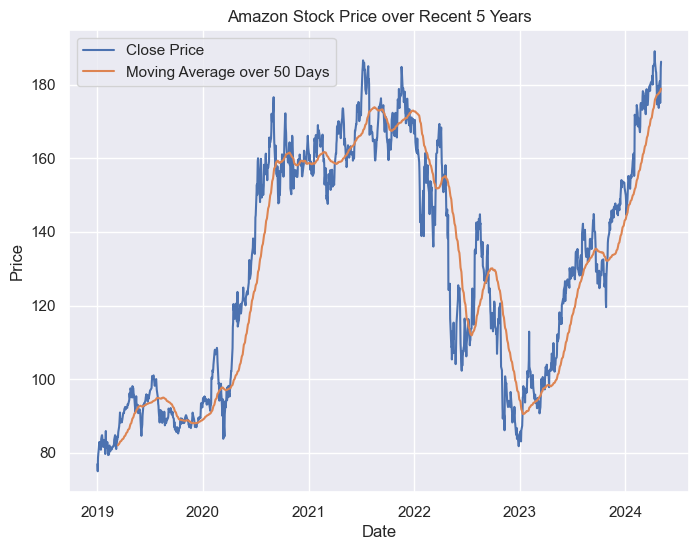

In [4]:
# General Visualization for the Closed Price
plt.plot(amzn.index, amzn['Close'], label = "Close Price")
plt.plot(amzn.index, amzn['MA50'], label = "Moving Average over 50 Days")
plt.title('Amazon Stock Price over Recent 5 Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show

<Axes: xlabel='Date'>

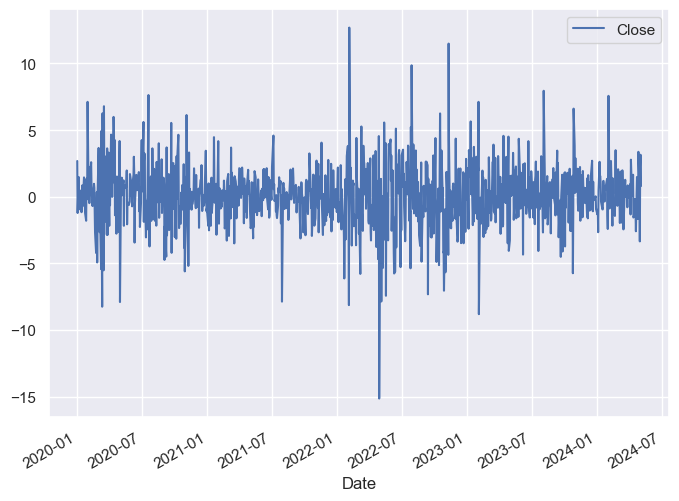

In [5]:
# Visualizing the Stock Return

amzn_return[252:].plot()

On the graph, you will see there will be some seasonal either high/low spikes, that describes an anomaly that happens rarely in 5 years, such as here at around July of 2022.

In [6]:
# Description using matplotlib
# Make sure you drop the NA, since it will not be included into the evaluation of the data
amzn_return.dropna(inplace = True)
amzn_return.describe()

,Close
count,1343.000000
mean,0.065815
std,2.187656
min,-15.140000
25%,-1.075000
50%,0.110000
75%,1.200000
max,12.690000


In [7]:
# Description using scipy
# Taking the note from the dropna above, if we do not do that, this result will be lot of NA
from scipy import stats
stats.describe(amzn_return)

DescribeResult(nobs=1343, minmax=(array([-15.14]), array([12.69])), mean=array([0.06581534]), variance=array([4.78583851]), skewness=array([-0.09627984]), kurtosis=array([4.37385327]))

The Scipy stats will give you more precise number of the data which is good, and evenmore it also gives you many other components, such as skewness, and kurtosis. Sadly, the variance and skewness here do not give you much information as it is approximately 0. But, then the kurtosis tells a different story as it is quite ehigh and gives me a positive number.

In fact here, the kurtosis that we have is the Fischer Kurtosis, could be defined as the normalized Kurtosis. It is substracted by `3` from the raw kurtosis value, hence its raw form can be expressed as `7.4`. This high Kurtosis is usually called Leptokurtic, and it means th graph is fat-tailed, which means the outlier is quite frequent to come, that means eventhough there are a lot of boring days, it will also be often taht some big day comes either positive/negative trends.

In [8]:
n, minmax, mean, var, skew, krt = stats.describe(amzn_return)
mini, maxi = minmax
std = var ** 0.5

### 5. For Comparison, generate random numbers that follow normal distribution

In [9]:
from scipy.stats import norm

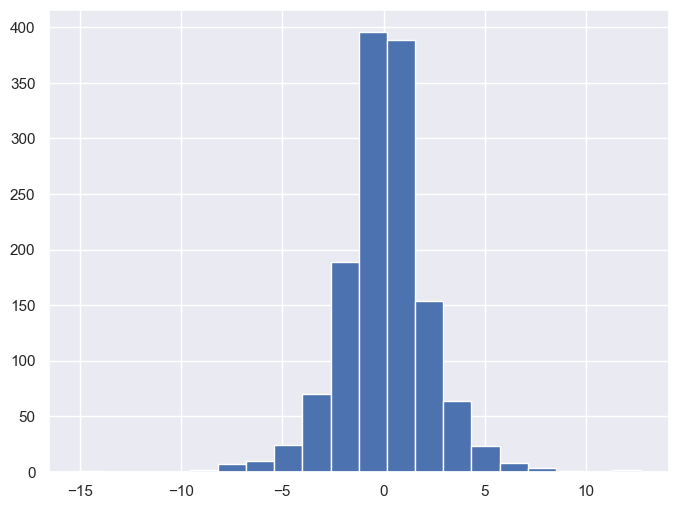

In [10]:
plt.hist(amzn_return, bins=20,);

(array([  2.,   2.,   4.,  18.,  34.,  46.,  93., 126., 155., 191., 175.,
        167., 132.,  96.,  56.,  28.,  11.,   4.,   2.,   1.]),
 array([-7.79800992, -7.00803911, -6.21806831, -5.4280975 , -4.6381267 ,
        -3.8481559 , -3.05818509, -2.26821429, -1.47824349, -0.68827268,
         0.10169812,  0.89166892,  1.68163973,  2.47161053,  3.26158133,
         4.05155214,  4.84152294,  5.63149374,  6.42146455,  7.21143535,
         8.00140615]),
 <BarContainer object of 20 artists>)

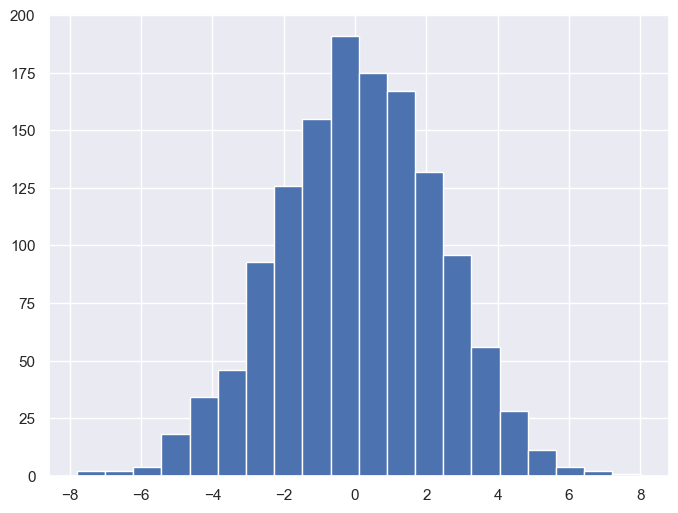

In [12]:
from scipy.stats import norm
a = norm.rvs(mean, std, n)

plt.hist(a, bins = 20)

On the normal distribution, you will see that it is well spread and the outliers are very rarely happened, and it could not be represented well in the data. While, in our Amazon data, it is seen that on the nearly most left and right side of the curve, the difference seems more frequent.

After comparing the data visualization, there will be a big question in my head

## Is Price Change Normally distributed?

Logicly speaking from the data visualization, I will claim that the price change is not normally distributed, but then we need to prove it via a statistical way right? then, here we are going to use scipy stats to test the kurtosis again, and define its p-value and test statistics value. Usually, we will reject the nullhypothesis when the p-value is less than 0.05 and we will accept it as the normal distribution if it is higher than 0.05. The null hypothesis is the sample which is drawn from a population where the underlying kurtosis is that of a normally distributed variable. Now, let's code.

In [18]:
a_test = stats.kurtosistest(a)
amzn_test = stats.kurtosistest(amzn_return)

print(f'{"Test Statistic":<20}{"P-Value":>10}')
print(f'{"="*30}')
print(f"x: {a_test[0]:<15.2f}{a_test[1]:>10.4f}")
print(f"AMZN: {amzn_test[0][0]:<13.2f}{amzn_test[1][0]:>10.4f}")

Test Statistic         P-Value
x: -0.15              0.8822
AMZN: 11.80            0.0000


Then, obviously we will reject the Amazon return price, since its p-value is so small nearly to 0. Thus, the data is not normally distributed as we claim at first.

### 6. Plot Histogram of Price Changes with Normal Curve Overlay

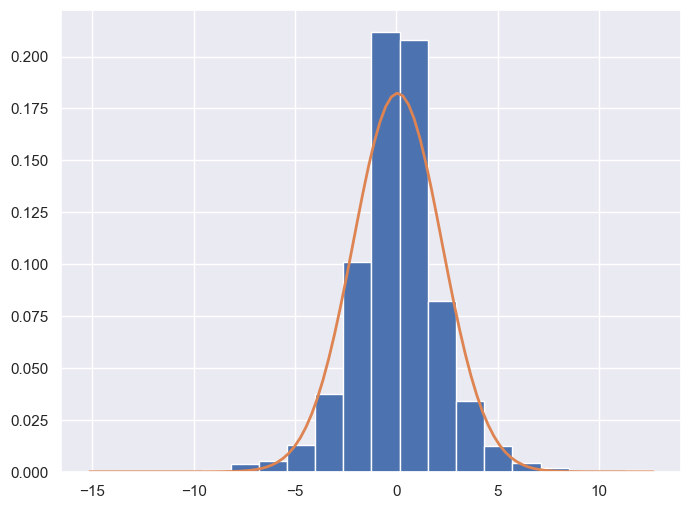

In [25]:
plt.hist(amzn_return, bins = 20, edgecolor = 'w', density = True)
overlays = np.linspace(mini, maxi,100)
plt.plot(overlays, norm.pdf(overlays, mean, std), linewidth = 2);

#### Hence, the answer for the first question is NO. The return price can not be represented as normal distribution.

## Is daily price change significantly different from zero/Is it quite bias through it?

We are going to use the ttest (two tailed test) to define whether there is any bias, with the value of null hypothesis is 0. So, if it is significantly smaller or larger than zero, we can say that the return price has some directional bias

In [26]:
stats.ttest_1samp(amzn_return, 0, alternative = 'two-sided')

TtestResult(statistic=array([1.10251906]), pvalue=array([0.27043375]), df=array([1342]))

When evaluating statistical significance using a p-value, a value significantly larger than 0.05 (not 0.5) suggests that we cannot reject the null hypothesis, indicating that the observed effect might be due to chance. In the context of hypothesis testing, it is crucial to consider the sample size. A larger dataset can diminish the apparent impact of bias, making it harder to detect subtle biases because the overall trend overshadows minor variations. Conversely, with a smaller sample size, biases and anomalies are more prominent, allowing for a clearer assessment of their existence and impact. Therefore, while large samples provide robustness, they can obscure underlying biases, necessitating careful interpretation and the potential use of smaller, more controlled samples to detect and understand these biases effectively.

In [28]:
stats.ttest_1samp(amzn_return.sample(252), 0, alternative = 'two-sided')

TtestResult(statistic=array([-0.86265734]), pvalue=array([0.38914937]), df=array([251]))

Then, from both test, we know that we chould accept this hypothesis test. And it ends up that there is a 38% chacne that if I reject the null that I will be making a mistake. Thus, either using 0.05 or 0.01 as my a-value, I will accept my hypothesis value and agreed that there will be some biases into it.

## Can price movement be described as a Random Walk?

In finance, a random walk describes a statistical phenomenon where a variable, such as stock prices, moves in an unpredictable manner, with no discernible pattern or trend. When data follows a random walk, forecasting future movements becomes challenging because past movements provide no reliable basis for prediction. To determine if price returns follow a random walk, one can use statistical tests such as the Augmented Dickey-Fuller test. Identifying non-random patterns is crucial for effective prediction. A good predictor should leverage current data to forecast future movements accurately, making it valuable for traders and analysts aiming to anticipate market trends and make informed decisions. Here, I am going to implement tow ways, one using ADF Test and the other one using a manual linear regression with price lags. Hope both of the graphs will give me the same result.

In [36]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(amzn_return)

# Print the test statistics
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

if adf_result[1] < 0.05:
    print("Reject the null hypothesis - the time series is stationary.")
else:
    print("Fail to reject the null hypothesis - the time series is non-stationary.")

ADF Statistic: -37.849895867372204
p-value: 0.0
Critical Values: {'1%': -3.4352321552179914, '5%': -2.863696093312285, '10%': -2.567917908453473}
Reject the null hypothesis - the time series is stationary.


From the ADF test above, we have found out that our null hypothesis is rejeceted, which means the proce movemenet can not be described as a random walk. HOLD this answer for a while, let's prove it by another way

### 7. Create Price Lags and Fit Linear Regression Model

In [45]:
amzn_close = pd.DataFrame(amzn_close, columns = ['Close'])
amzn_close['lag_1'] = amzn_close.Close.shift(1)
amzn_close['lag_2'] = amzn_close.Close.shift(2)
amzn_close.dropna(inplace = True)
amzn_close[-5:]

,Close,lag_1,lag_2
Date,,,
2024-04-29,180.960007,179.619995,173.669998
2024-04-30,175.000000,180.960007,179.619995
2024-05-01,179.000000,175.000000,180.960007
2024-05-02,184.720001,179.000000,175.000000
2024-05-03,186.210007,184.720001,179.000000


In [53]:
lr = np.linalg.lstsq(amzn_close[['lag_1', 'lag_2']], amzn_close['Close'], rcond = None)[0]

Using that information, it is telling me that 97% of the price for tomorrow's price can be predicted by today's price, this is a little hint for us to answer no to our thrid question. But, let we dive in a bit with its prediction graph also and fit it on the actual data

In [54]:
amzn_close['predict'] = np.dot(amzn_close[['lag_1', 'lag_2']], lr)
amzn_close[-5:]

,Close,lag_1,lag_2,predict
Date,,,,
2024-04-29,180.960007,179.619995,173.669998,179.552723
2024-04-30,175.000000,180.960007,179.619995,180.997606
2024-05-01,179.000000,175.000000,180.960007,175.200631
2024-05-02,184.720001,179.000000,175.000000,178.976642
2024-05-03,186.210007,184.720001,179.000000,184.659851


<Axes: xlabel='Date'>

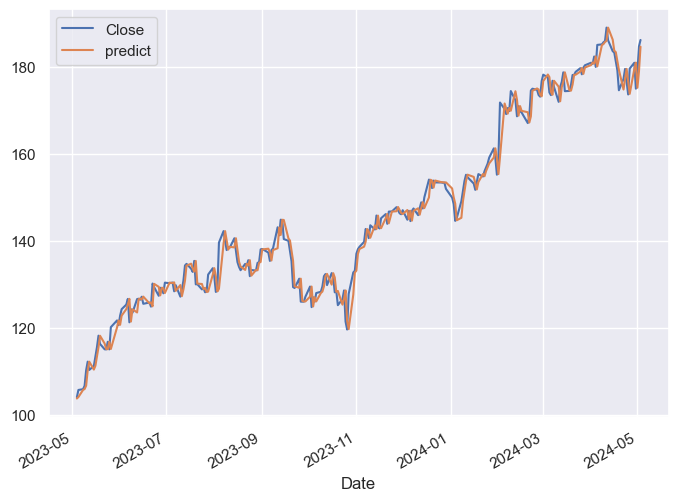

In [56]:
amzn_close.iloc[-252:][['Close', 'predict']].plot()

#### Perfect, now we can conclude that the data can be predicted from the previous day, which means the data is not a random walk. This is good as a starting point for the quantitative analysis on forecasting price for the future intention. That will be the wrap up for this basic notebook things. Thank You.